In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset

In [2]:
data=pd.read_csv('Drugeffects.csv').drop(columns=['Unnamed: 0'])

In [3]:
data.head()

,urlDrugName,rating,effectiveness,condition,sideEffects
0,enalapril,4,Highly Effective,management of congestive heart failure,Mild Side Effects
1,ortho-tri-cyclen,1,Highly Effective,birth prevention,Severe Side Effects
2,ponstel,10,Highly Effective,menstrual cramps,No Side Effects
3,prilosec,3,Marginally Effective,acid reflux,Mild Side Effects
4,lyrica,2,Marginally Effective,fibromyalgia,Severe Side Effects


In [4]:
data.shape

(3107, 5)

In [5]:
data.to_csv('tcs.csv',index=False)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   urlDrugName    3107 non-null   object
 1   rating         3107 non-null   int64 
 2   effectiveness  3107 non-null   object
 3   condition      3106 non-null   object
 4   sideEffects    3107 non-null   object
dtypes: int64(1), object(4)
memory usage: 72.9+ KB


In [7]:
data.describe()

,rating
count,3107.000000
mean,7.006115
std,2.937582
min,1.000000
25%,5.000000
50%,8.000000
75%,9.000000
max,10.000000


In [8]:
data.columns

Index(['urlDrugName', 'rating', 'effectiveness', 'condition', 'sideEffects'], dtype='object')

In [9]:
data.dtypes

urlDrugName      object
rating            int64
effectiveness    object
condition        object
sideEffects      object
dtype: object

In [10]:
data.nunique()

urlDrugName       502
rating             10
effectiveness       5
condition        1426
sideEffects         5
dtype: int64

# Checking for missing values

In [11]:
data.isna().sum()

urlDrugName      0
rating           0
effectiveness    0
condition        1
sideEffects      0
dtype: int64

In [12]:
data=data.dropna(axis=0)

In [13]:
data.isna().sum()

urlDrugName      0
rating           0
effectiveness    0
condition        0
sideEffects      0
dtype: int64

# Exploratory data analysis

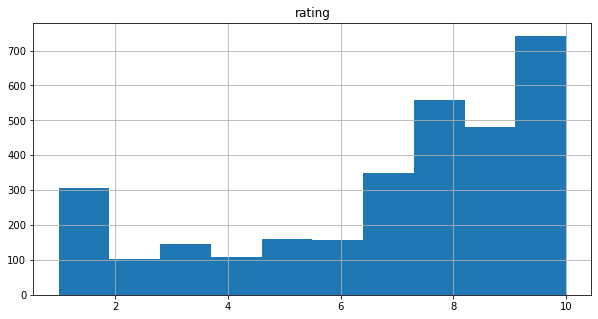

In [14]:
fregraph=data.select_dtypes(include=['int64'])
fregraph.hist(figsize=(10,5))
plt.show()

In [15]:
data.columns

Index(['urlDrugName', 'rating', 'effectiveness', 'condition', 'sideEffects'], dtype='object')

Text(0.5, 1.0, 'Top20 : The number of drugs per condition.')

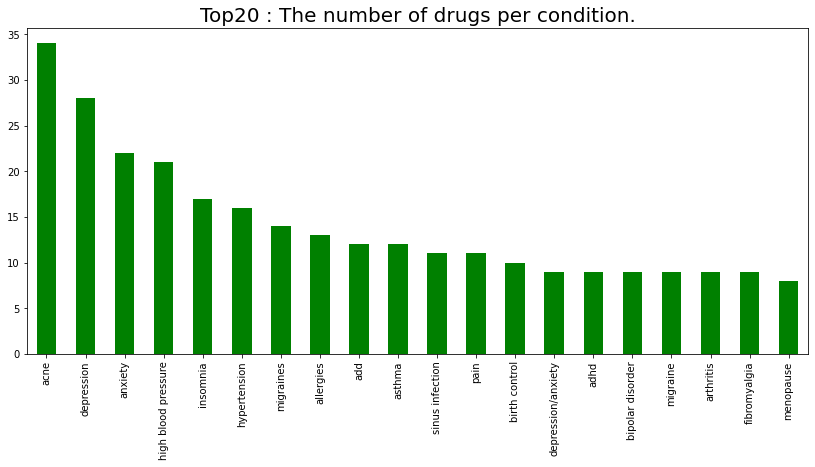

In [16]:
condition_dn = data.groupby(['condition'])['urlDrugName'].nunique().sort_values(ascending=False)
condition_dn[0:20].plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Top20 : The number of drugs per condition.", fontsize = 20)

In [17]:
conditions = data["condition"].value_counts().sort_values(ascending=False)
conditions[:10]

depression             236
acne                   165
anxiety                 63
insomnia                54
birth control           49
high blood pressure     42
allergies               37
acid reflux             33
asthma                  33
migraines               31
Name: condition, dtype: int64

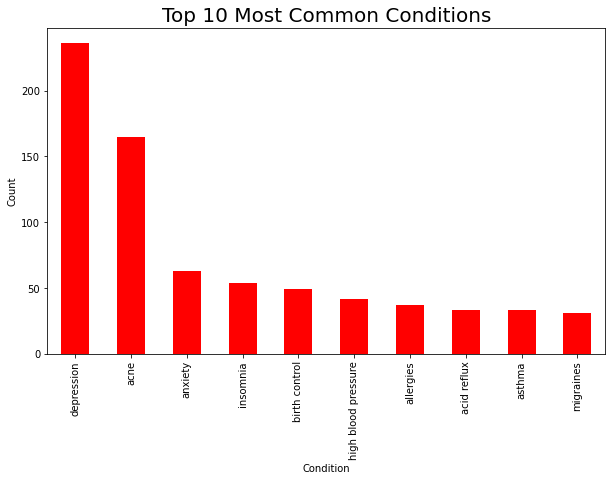

In [18]:
conditions[:10].plot(kind='bar', figsize = (10,6), fontsize = 10, color="red")
plt.title('Top 10 Most Common Conditions',fontsize = 20)
plt.xlabel('Condition')
plt.ylabel('Count');

Text(0.5, 1.0, 'Count of rating values')

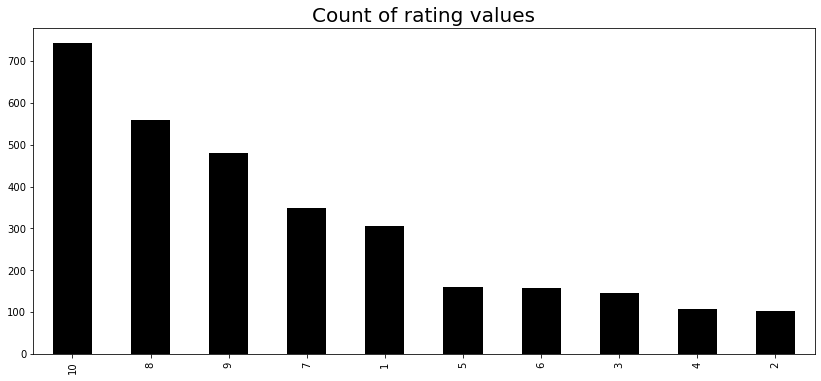

In [19]:
rating = data['rating'].value_counts().sort_values(ascending=False)
rating.plot(kind="bar", figsize = (14,6), fontsize = 10,color="black")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Count of rating values", fontsize = 20)

C:\Users\DHYAN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


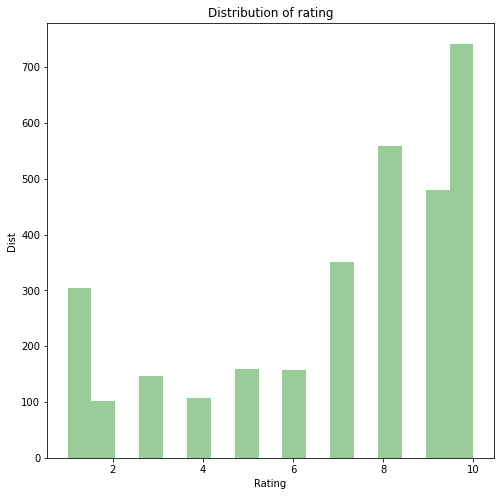

In [20]:
plt.figure(figsize=(8,8))
sns.distplot(data['rating'], color='green', norm_hist=False, kde=False)

plt.xlabel('Rating')
plt.ylabel('Dist')
plt.title("Distribution of rating")
plt.show()

C:\Users\DHYAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


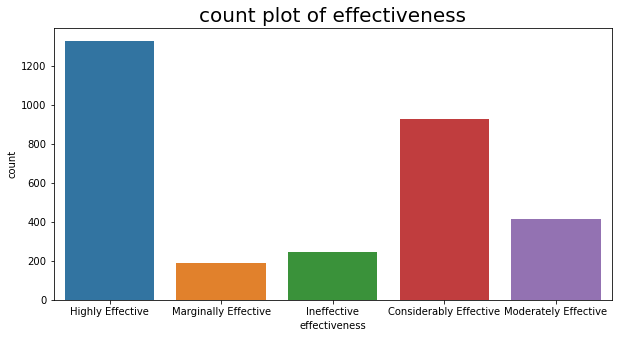

In [21]:
plt.figure(figsize = (10,5))
sns.countplot(data.effectiveness)
plt.title('count plot of effectiveness',fontsize = 20)
plt.show()



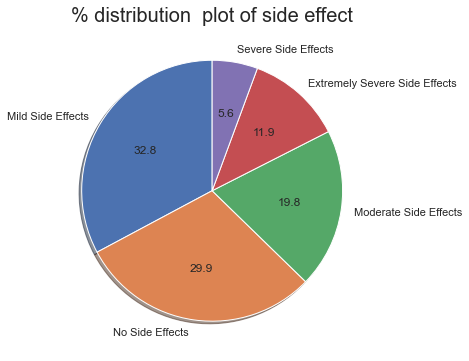

In [72]:
plt.figure(figsize = (6,6))
plt.pie(data['sideEffects'].value_counts(), startangle = 90, autopct = '%.1f', labels = ['Mild Side Effects', 'No Side Effects ','Moderate Side Effects','Extremely Severe Side Effects','Severe Side Effects'], shadow = True)
plt.title('% distribution  plot of side effect',fontsize = 20)
plt.show()

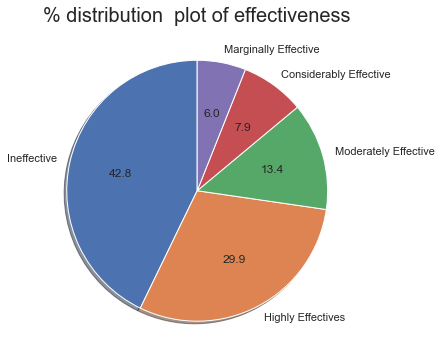

In [71]:
plt.figure(figsize = (6,6))
plt.pie(data['effectiveness'].value_counts(), startangle = 90, autopct = '%.1f', labels = ['Ineffective', 'Highly Effectives','Moderately Effective','Considerably Effective','Marginally Effective'], shadow = True)
plt.title('% distribution  plot of effectiveness',fontsize = 20)
plt.show()

In [24]:
data.columns

Index(['urlDrugName', 'rating', 'effectiveness', 'condition', 'sideEffects'], dtype='object')

In [25]:
drug = data["urlDrugName"].value_counts().sort_values(ascending=False)
drug[:10]

lexapro        63
prozac         46
zoloft         45
retin-a        45
propecia       38
paxil          38
synthroid      38
effexor        33
doxycycline    33
cymbalta       33
Name: urlDrugName, dtype: int64

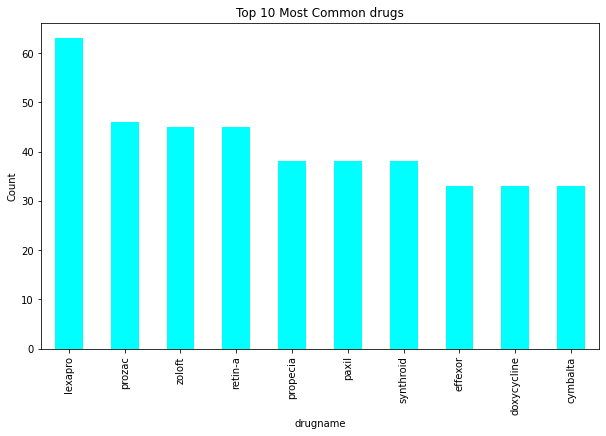

In [26]:
drug[:10].plot(kind='bar', figsize = (10,6), fontsize = 10, color="cyan")
plt.title('Top 10 Most Common drugs')
plt.xlabel('drugname')
plt.ylabel('Count');

In [27]:
df_Drug = data.groupby(["urlDrugName", "rating"]).size().reset_index(name = "Count")
df_Drug

,urlDrugName,rating,Count
0,abilify,2,1
1,abilify,3,1
2,abilify,6,1
3,abilify,8,1
4,abilify,10,1
...,...,...,...
1537,zyrtec,10,7
1538,zyrtec-d,5,1
1539,zyrtec-d,7,1
1540,zyrtec-d,9,1


In [28]:
import seaborn as sns

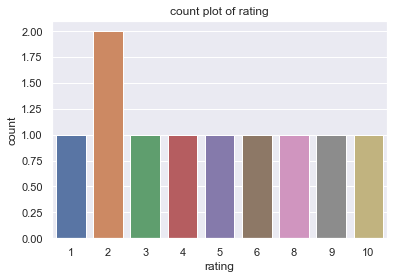

In [29]:
sns.set(style="darkgrid")
ax = sns.countplot(x='rating',  data=df_Drug[:10])
plt.title('count plot of rating')
plt.show()

<AxesSubplot:xlabel='sideEffects', ylabel='count'>

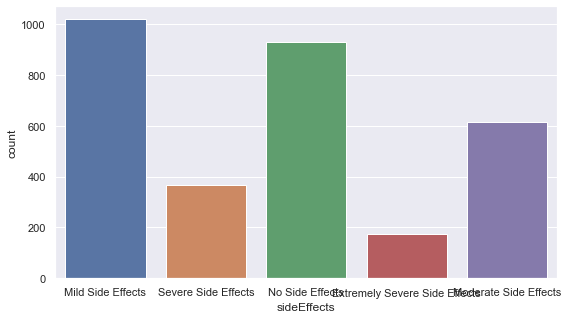

In [30]:
plt.figure(figsize = (9,5))
sns.countplot(x="sideEffects", data=data)

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [32]:
data.columns

Index(['urlDrugName', 'rating', 'effectiveness', 'condition', 'sideEffects'], dtype='object')

In [33]:
x=data.drop(['sideEffects'],axis=1)

In [34]:
y=data['sideEffects']

In [35]:
x['urlDrugName'] = le.fit_transform(x['urlDrugName'])
x['condition']=le.fit_transform(x['condition'])
x['effectiveness'] = le.fit_transform(x['effectiveness'])


In [36]:
x

,urlDrugName,rating,effectiveness,condition
0,166,4,1,797
1,319,1,1,224
2,345,10,1,819
3,353,3,3,11
4,259,2,3,492
...,...,...,...,...
3102,472,10,1,48
3103,493,1,2,369
3104,100,2,3,1365
3105,445,8,0,450


In [37]:
y

0                   Mild Side Effects
1                 Severe Side Effects
2                     No Side Effects
3                   Mild Side Effects
4                 Severe Side Effects
                    ...              
3102                Mild Side Effects
3103    Extremely Severe Side Effects
3104            Moderate Side Effects
3105                Mild Side Effects
3106            Moderate Side Effects
Name: sideEffects, Length: 3106, dtype: object

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [39]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_prediction=logit_model.predict(x_test)

C:\Users\DHYAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
# print('Confusion_matrix is :\n',confusion_matrix(y_test,y_pred))
print('Classification report :\n' ,classification_report(y_test,y_prediction))

Classification report :
                                precision    recall  f1-score   support

Extremely Severe Side Effects       0.00      0.00      0.00        34
            Mild Side Effects       0.34      0.47      0.40       194
        Moderate Side Effects       0.38      0.14      0.20       117
              No Side Effects       0.38      0.41      0.40       201
          Severe Side Effects       0.38      0.45      0.41        76

                     accuracy                           0.36       622
                    macro avg       0.30      0.29      0.28       622
                 weighted avg       0.35      0.36      0.34       622



C:\Users\DHYAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_prediction)

array([[  0,   2,   1,   1,  30],
       [  0,  92,   6,  90,   6],
       [  0,  55,  16,  35,  11],
       [  0, 104,   5,  83,   9],
       [  0,  18,  14,  10,  34]], dtype=int64)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbours=np.arange(3,15)
for k in neighbours:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
  classifier.fit(x_train,y_train)
  y_prediction=classifier.predict(x_test)
  acc=accuracy_score(y_test,y_prediction)
  acc_values.append(acc)

In [43]:
acc_values

[0.36977491961414793,
 0.3392282958199357,
 0.3408360128617363,
 0.3408360128617363,
 0.33440514469453375,
 0.3279742765273312,
 0.34565916398713825,
 0.34565916398713825,
 0.33762057877813506,
 0.342443729903537,
 0.3520900321543408,
 0.3360128617363344]

Text(0, 0.5, 'accuracy')

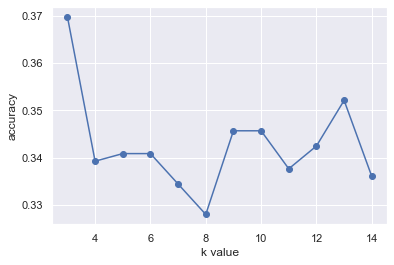

In [44]:
plt.plot(neighbours,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [45]:
classifier=KNeighborsClassifier(n_neighbors=3,metric='minkowski')
classifier.fit(x_train,y_train)
y_prediction=classifier.predict(x_test)

In [46]:
print(classification_report(y_test,y_prediction))

                               precision    recall  f1-score   support

Extremely Severe Side Effects       0.11      0.21      0.15        34
            Mild Side Effects       0.39      0.58      0.47       194
        Moderate Side Effects       0.28      0.20      0.23       117
              No Side Effects       0.49      0.40      0.44       201
          Severe Side Effects       0.23      0.08      0.12        76

                     accuracy                           0.37       622
                    macro avg       0.30      0.29      0.28       622
                 weighted avg       0.37      0.37      0.36       622



In [47]:
confusion_matrix(y_test,y_prediction)

array([[  7,   5,   9,   7,   6],
       [ 12, 113,  21,  45,   3],
       [ 11,  56,  23,  22,   5],
       [ 10,  85,  19,  81,   6],
       [ 21,  28,  11,  10,   6]], dtype=int64)

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(criterion='entropy')
dt_model.fit(x_train,y_train)
y_prediction=dt_model.predict(x_test)

In [49]:
print(classification_report(y_test,y_prediction))

                               precision    recall  f1-score   support

Extremely Severe Side Effects       0.43      0.59      0.50        34
            Mild Side Effects       0.43      0.52      0.47       194
        Moderate Side Effects       0.41      0.34      0.37       117
              No Side Effects       0.55      0.49      0.52       201
          Severe Side Effects       0.32      0.29      0.31        76

                     accuracy                           0.45       622
                    macro avg       0.43      0.45      0.43       622
                 weighted avg       0.45      0.45      0.45       622



In [50]:
confusion_matrix(y_test,y_prediction)

array([[ 20,   1,   1,   3,   9],
       [  1, 101,  30,  52,  10],
       [  5,  33,  40,  20,  19],
       [  4,  81,  10,  98,   8],
       [ 16,  17,  16,   5,  22]], dtype=int64)

In [51]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_prediction=svm_linear.predict(x_test)

In [52]:
confusion_matrix(y_test,y_prediction)

array([[  0,   1,   1,   0,  32],
       [  0, 117,  20,  50,   7],
       [  0,  58,  26,  12,  21],
       [  0,  82,  15,  95,   9],
       [  0,  13,  15,   5,  43]], dtype=int64)

In [53]:
print(classification_report(y_test,y_prediction))

                               precision    recall  f1-score   support

Extremely Severe Side Effects       0.00      0.00      0.00        34
            Mild Side Effects       0.43      0.60      0.50       194
        Moderate Side Effects       0.34      0.22      0.27       117
              No Side Effects       0.59      0.47      0.52       201
          Severe Side Effects       0.38      0.57      0.46        76

                     accuracy                           0.45       622
                    macro avg       0.35      0.37      0.35       622
                 weighted avg       0.43      0.45      0.43       622



C:\Users\DHYAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
svm_poly=SVC(kernel='poly',degree=3)
svm_poly.fit(x_train,y_train)
y_prediction=svm_poly.predict(x_test)

In [55]:
confusion_matrix(y_test,y_prediction)

array([[  0,  28,   0,   6,   0],
       [  0, 185,   0,   9,   0],
       [  0, 104,   0,  13,   0],
       [  0, 181,   0,  20,   0],
       [  0,  61,   0,  15,   0]], dtype=int64)

In [56]:
print(classification_report(y_test,y_prediction))

                               precision    recall  f1-score   support

Extremely Severe Side Effects       0.00      0.00      0.00        34
            Mild Side Effects       0.33      0.95      0.49       194
        Moderate Side Effects       0.00      0.00      0.00       117
              No Side Effects       0.32      0.10      0.15       201
          Severe Side Effects       0.00      0.00      0.00        76

                     accuracy                           0.33       622
                    macro avg       0.13      0.21      0.13       622
                 weighted avg       0.21      0.33      0.20       622



C:\Users\DHYAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
svm_radial=SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)
y_prediction=svm_radial.predict(x_test)

In [58]:
print(classification_report(y_test,y_prediction))

                               precision    recall  f1-score   support

Extremely Severe Side Effects       0.00      0.00      0.00        34
            Mild Side Effects       0.33      0.70      0.45       194
        Moderate Side Effects       0.00      0.00      0.00       117
              No Side Effects       0.34      0.35      0.35       201
          Severe Side Effects       0.00      0.00      0.00        76

                     accuracy                           0.33       622
                    macro avg       0.13      0.21      0.16       622
                 weighted avg       0.21      0.33      0.25       622



C:\Users\DHYAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
confusion_matrix(y_test,y_prediction)

array([[  0,  17,   0,  17,   0],
       [  0, 136,   0,  58,   0],
       [  0,  83,   0,  34,   0],
       [  0, 130,   0,  71,   0],
       [  0,  46,   0,  30,   0]], dtype=int64)

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_prediction=rf.predict(x_test)

In [61]:
print(classification_report(y_test,y_prediction))

                               precision    recall  f1-score   support

Extremely Severe Side Effects       0.47      0.53      0.50        34
            Mild Side Effects       0.47      0.53      0.50       194
        Moderate Side Effects       0.35      0.34      0.35       117
              No Side Effects       0.59      0.55      0.57       201
          Severe Side Effects       0.41      0.34      0.37        76

                     accuracy                           0.48       622
                    macro avg       0.46      0.46      0.46       622
                 weighted avg       0.48      0.48      0.48       622



In [62]:
confusion_matrix(y_test,y_prediction)

array([[ 18,   1,   3,   3,   9],
       [  1, 102,  34,  48,   9],
       [  3,  32,  40,  25,  17],
       [  3,  68,  16, 111,   3],
       [ 13,  14,  21,   2,  26]], dtype=int64)

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_prediction=gb.predict(x_test)

In [64]:
print(classification_report(y_test,y_prediction))

                               precision    recall  f1-score   support

Extremely Severe Side Effects       0.44      0.56      0.49        34
            Mild Side Effects       0.49      0.60      0.54       194
        Moderate Side Effects       0.37      0.38      0.37       117
              No Side Effects       0.68      0.54      0.60       201
          Severe Side Effects       0.42      0.36      0.39        76

                     accuracy                           0.50       622
                    macro avg       0.48      0.49      0.48       622
                 weighted avg       0.52      0.50      0.51       622



In [65]:
confusion_matrix(y_test,y_prediction)

array([[ 19,   1,   2,   1,  11],
       [  3, 116,  33,  39,   3],
       [  5,  43,  44,   8,  17],
       [  3,  70,  14, 108,   6],
       [ 13,   9,  25,   2,  27]], dtype=int64)

In [66]:
# from sklearn import preprocessing
# min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
# x_trainmin=min_max.fit_transform(x_train)
# x_testmin=min_max.fit_transform(x_test)

In [67]:
from sklearn import preprocessing
standardisation=preprocessing.StandardScaler()
x_train=standardisation.fit_transform(x_train)
x_test=standardisation.fit_transform(x_test)



In [68]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(criterion='entropy')
dt_model.fit(x_train,y_train)
y_prediction=dt_model.predict(x_test)

In [69]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print('Classification report :\n' ,classification_report(y_test,y_prediction))

Classification report :
                                precision    recall  f1-score   support

Extremely Severe Side Effects       0.39      0.53      0.45        34
            Mild Side Effects       0.43      0.52      0.47       194
        Moderate Side Effects       0.40      0.35      0.37       117
              No Side Effects       0.51      0.43      0.47       201
          Severe Side Effects       0.36      0.34      0.35        76

                     accuracy                           0.44       622
                    macro avg       0.42      0.43      0.42       622
                 weighted avg       0.44      0.44      0.44       622



In [73]:
print('Confusion_matrix is :\n',confusion_matrix(y_test,y_prediction))

Confusion_matrix is :
 [[ 18   1   2   4   9]
 [  2 101  29  54   8]
 [  5  33  41  19  19]
 [  5  87  12  86  11]
 [ 16  11  18   5  26]]


In [74]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_prediction=svm_linear.predict(x_test)

In [75]:
print('Classification report :\n' ,classification_report(y_test,y_prediction))

Classification report :
                                precision    recall  f1-score   support

Extremely Severe Side Effects       0.00      0.00      0.00        34
            Mild Side Effects       0.43      0.60      0.50       194
        Moderate Side Effects       0.35      0.22      0.27       117
              No Side Effects       0.59      0.49      0.54       201
          Severe Side Effects       0.38      0.57      0.46        76

                     accuracy                           0.46       622
                    macro avg       0.35      0.38      0.35       622
                 weighted avg       0.44      0.46      0.44       622



C:\Users\DHYAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
print('Confusion_matrix is :\n',confusion_matrix(y_test,y_prediction))

Confusion_matrix is :
 [[  0   1   1   0  32]
 [  0 116  18  53   7]
 [  0  58  26  12  21]
 [  0  78  15  99   9]
 [  0  14  14   5  43]]


In [77]:
svm_poly=SVC(kernel='poly',degree=3)
svm_poly.fit(x_train,y_train)
y_prediction=svm_poly.predict(x_test)

In [78]:
print('Classification report :\n' ,classification_report(y_test,y_prediction))

Classification report :
                                precision    recall  f1-score   support

Extremely Severe Side Effects       0.48      0.71      0.57        34
            Mild Side Effects       0.38      0.81      0.52       194
        Moderate Side Effects       0.38      0.22      0.28       117
              No Side Effects       0.63      0.19      0.30       201
          Severe Side Effects       0.39      0.16      0.22        76

                     accuracy                           0.41       622
                    macro avg       0.45      0.42      0.38       622
                 weighted avg       0.47      0.41      0.37       622



In [79]:
print('Confusion_matrix is :\n',confusion_matrix(y_test,y_prediction))

Confusion_matrix is :
 [[ 24   2   2   0   6]
 [  2 157  14  19   2]
 [  3  78  26   3   7]
 [  4 147   7  39   4]
 [ 17  27  19   1  12]]


In [80]:
svm_radial=SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)
y_prediction=svm_radial.predict(x_test)

In [81]:
print('Classification report :\n' ,classification_report(y_test,y_prediction))

Classification report :
                                precision    recall  f1-score   support

Extremely Severe Side Effects       0.52      0.41      0.46        34
            Mild Side Effects       0.46      0.60      0.52       194
        Moderate Side Effects       0.38      0.31      0.34       117
              No Side Effects       0.64      0.54      0.58       201
          Severe Side Effects       0.39      0.38      0.39        76

                     accuracy                           0.49       622
                    macro avg       0.48      0.45      0.46       622
                 weighted avg       0.50      0.49      0.49       622



In [82]:
print('Confusion_matrix is :\n',confusion_matrix(y_test,y_prediction))

Confusion_matrix is :
 [[ 14   0   3   0  17]
 [  1 117  19  52   5]
 [  2  55  36   8  16]
 [  2  72  12 108   7]
 [  8  13  25   1  29]]


In [84]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_prediction=rf.predict(x_test)


In [85]:
print('Classification report :\n' ,classification_report(y_test,y_prediction))

Classification report :
                                precision    recall  f1-score   support

Extremely Severe Side Effects       0.41      0.50      0.45        34
            Mild Side Effects       0.49      0.52      0.50       194
        Moderate Side Effects       0.37      0.38      0.38       117
              No Side Effects       0.58      0.55      0.56       201
          Severe Side Effects       0.34      0.29      0.31        76

                     accuracy                           0.47       622
                    macro avg       0.44      0.45      0.44       622
                 weighted avg       0.47      0.47      0.47       622



In [86]:
print('Confusion_matrix is :\n',confusion_matrix(y_test,y_prediction))

Confusion_matrix is :
 [[ 17   0   3   3  11]
 [  2 100  33  52   7]
 [  2  28  45  22  20]
 [  4  64  19 110   4]
 [ 16  14  21   3  22]]


In [87]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_prediction=gb.predict(x_test)

In [88]:
print('Classification report :\n' ,classification_report(y_test,y_prediction))

Classification report :
                                precision    recall  f1-score   support

Extremely Severe Side Effects       0.42      0.56      0.48        34
            Mild Side Effects       0.47      0.50      0.48       194
        Moderate Side Effects       0.32      0.41      0.36       117
              No Side Effects       0.65      0.52      0.58       201
          Severe Side Effects       0.38      0.30      0.34        76

                     accuracy                           0.47       622
                    macro avg       0.45      0.46      0.45       622
                 weighted avg       0.49      0.47      0.47       622



In [89]:
print('Confusion_matrix is :\n',confusion_matrix(y_test,y_prediction))

Confusion_matrix is :
 [[ 19   1   3   0  11]
 [  2  97  45  46   4]
 [  4  37  48  10  18]
 [  3  65  23 105   5]
 [ 17   7  29   0  23]]
